# Lab: Classification with Decision Trees

**Objectives of the practical work:**

1. Learn how to build decision trees with scikit-learn  
2. Be familiar with some parameters and visualization tools
3. Use a real-case dataset (COMPASS ) as an example
4. Evaluate diverse trees in terms of training and testing accuracies with different parameters
5. Study the impact of some parameters on the sensitivity aspect




## PART 1: Basic steps 

The following are basic instructions to start with decision trees. You need to execute them one by one to understand the basic steps for learning decision trees. Once you get familiar with the different steps, you will be working on the compass dataset. 

The decision tree package that we use is from scikit-learn. The full documentation of decision trees are available at https://scikit-learn.org/stable/modules/tree.html

Take a moment to briefly consult the documentation.

We need first to include some libraries: 




In [1]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

The following is a basic example for binary classification



In [2]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

We construct a decision tree using the default parameters:

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Now we can ask the decision tree to predict the outcome for unknown examples. 
For instance we can ask a prediction for the three examples:

In [4]:
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

array([1, 1, 0])

The result is an array of the 3 predicted labels (one for each example): `array([0, 1, 0])`

## PART 2 : Visualization 

There are many ways to visualize a decision tree. The first one is very basic:



In [5]:
text_representation = tree.export_text(clf)
print(text_representation)



|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1



We can use a more readable and visual way as follows:

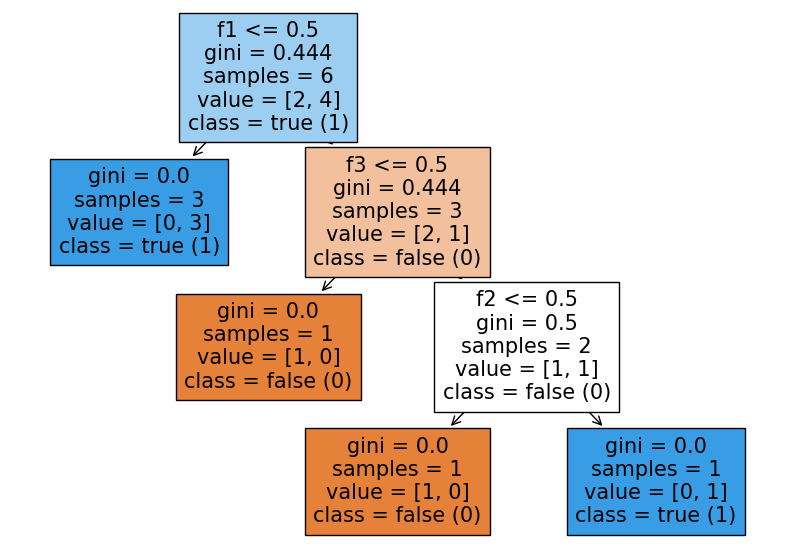

In [6]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, feature_names= ("f1","f2" , "f3", "f4"), class_names= ("false (0)", "true (1)" ),filled=True)


Where:
- `figsize` restrains the size of the plot,
- `feature_names` gives the names of the different features,
- `class_names` corresponds to human readable labels for each class,
- `filled` is a boolean indicating a preference to show a colorful tree. 


**Tasks:**
- Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation. 



## PART 3: The compass dataset

We study here the COMPASS dataset as a case study. Recall that it has been used in a legislative context for predicting recidivism in the U.S. That is, the tendency of a convicted criminal to re-offend


Have a look at the original non-binary dataset ([https://www.kaggle.com/danofer/compass](https://www.kaggle.com/danofer/compass)) to understand the different features. Consider in particular the data used for fairness: propublicaCompassRecividism_data_fairml.csv


**Understanding the dataset:**

Take a moment to think about the following questions 

- What are the features? 
- How many examples in the dataset?
- What are your expectations regarding the most important features? 
- Propose (informally) a way to reduce the dataset
- There many ways to binarize the dataset. How do you propose to do so?



Below, we use a binarized version of the dataset that is used in the FairCORELS library (https://github.com/ferryjul/fairCORELS) as well some of its tools. 

You need first to download the dataset and the tools file and put them in your work directory:

- The dataset [compass.csv](compass.csv)
- The set of tools [utils.py](utils.py)

Load the binary dataset `compass.csv` as follows 

In [7]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

#print(train_examples)
print(train_labels)
print(len(train_labels))
#print(features)
#print(prediction)

[1 0 0 ... 1 0 1]
5273


Inspect each of these 4 objects. What do they represent? How many features? examples? 

The first feature shows each sample for study, the second one shows values for Y of the tree, the third object shows the titles of the differents features from dataset, the last one shows the title of features prediction. 

Have a look at the different parameters of the `DecisionTreeClassifier` class constructor. We will be studying three parameters: 

- splitter
- max_depth 
- min_samples_leaf 

What do they represent? 

    splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

    max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    
    min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.



**Tasks:**

- 1:  Build severals decision trees (different parameters) and visualize them
- 2: Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test *multiple times*.
- 3: Do again the evaluation using 5-cross-validation
- 4: Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs. 
- 5: Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters? 
- 6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.

In [8]:
#Split dataset 80% training; 20% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=1, test_size = 0.2, train_size=0.80)

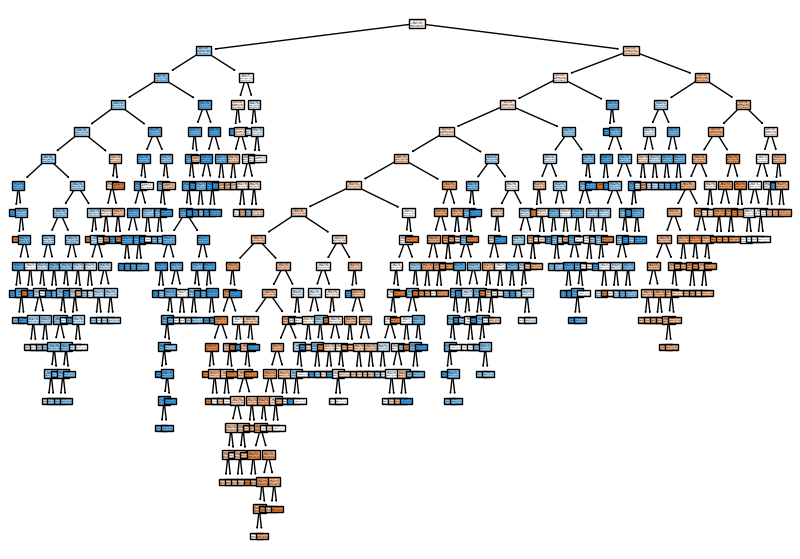

In [9]:
#Default

splitter="best"
max_depth=None
min_samples_leaf=1
clf0 = tree.DecisionTreeClassifier(splitter=splitter, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
clf0 = clf0.fit(x_train, y_train)


fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf0, class_names= ("false (0)", "true (1)" ),filled=True)


data=[]
data.append({'Splitter': splitter, 'Max depth': max_depth,  'Min samples': min_samples_leaf, 'Score eval': clf0.score(x_test, y_test)})

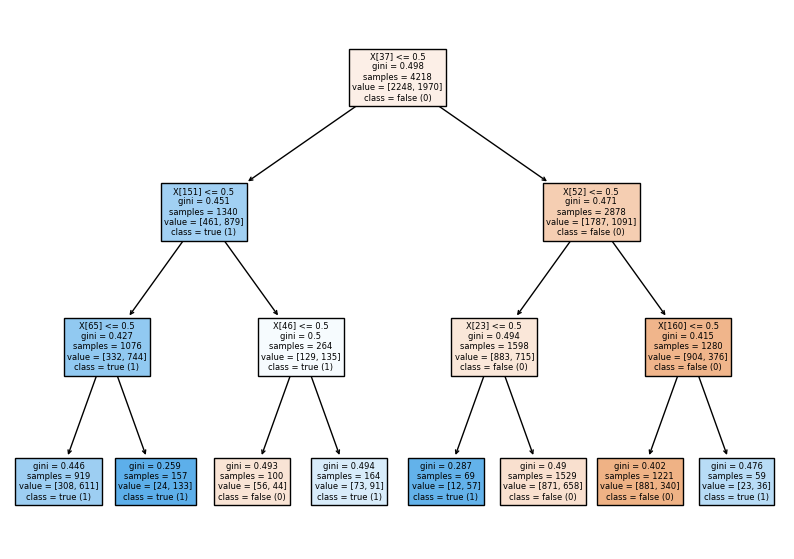

In [10]:
#Tree 1

splitter="best"
max_depth=3
min_samples_leaf=5

clf1 = tree.DecisionTreeClassifier(splitter=splitter, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
clf1 = clf1.fit(x_train, y_train)


fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf1, class_names= ("false (0)", "true (1)" ),filled=True)

data.append({'Splitter': splitter, 'Max depth': max_depth,  'Min samples': min_samples_leaf, 'Score eval': clf1.score(x_test, y_test)})

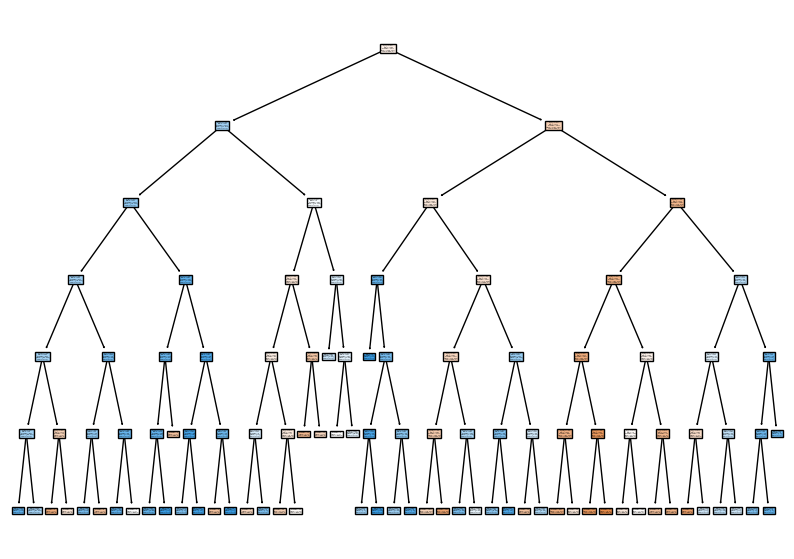

In [11]:
#Tree 2

splitter="best"
max_depth=6
min_samples_leaf=3
clf2 = tree.DecisionTreeClassifier(splitter=splitter, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
clf2 = clf2.fit(x_train, y_train)


fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf2, class_names= ("false (0)", "true (1)" ),filled=True)

data.append({'Splitter': splitter, 'Max depth': max_depth,  'Min samples': min_samples_leaf, 'Score eval': clf2.score(x_test, y_test)})

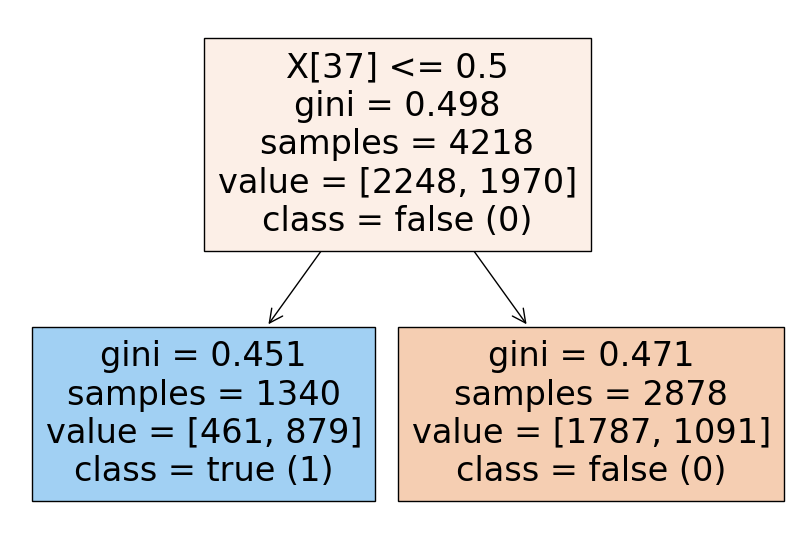

In [12]:
#Tree 3

splitter="best"
max_depth=1
min_samples_leaf=1
clf3 = tree.DecisionTreeClassifier(splitter=splitter, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
clf3 = clf3.fit(x_train, y_train)


fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf3, class_names= ("false (0)", "true (1)" ),filled=True)
data.append({'Splitter': splitter, 'Max depth': max_depth,  'Min samples': min_samples_leaf, 'Score eval': clf3.score(x_test, y_test)})

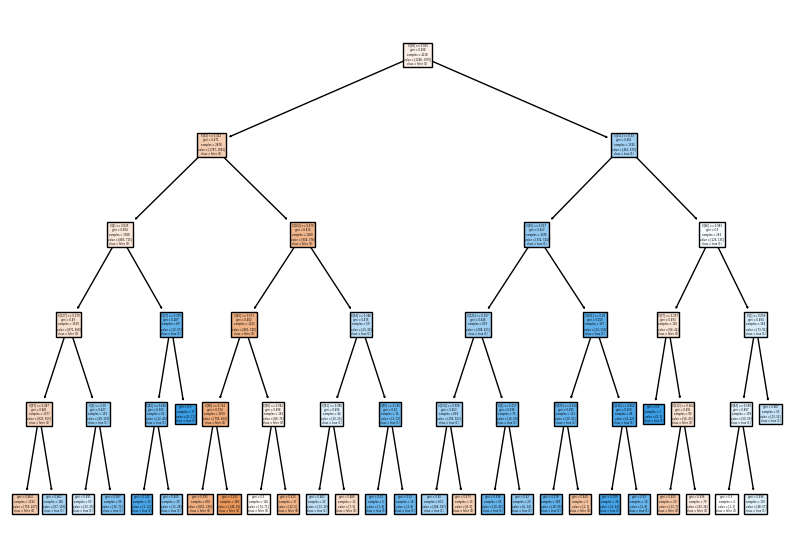

In [13]:
#Tree 4

splitter="random"
max_depth=5
min_samples_leaf=1
clf4 = tree.DecisionTreeClassifier(splitter=splitter, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
clf4 = clf4.fit(x_train, y_train)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf4, class_names= ("false (0)", "true (1)" ),filled=True)
data.append({'Splitter': splitter, 'Max depth': max_depth,  'Min samples': min_samples_leaf, 'Score eval': clf4.score(x_test, y_test)})


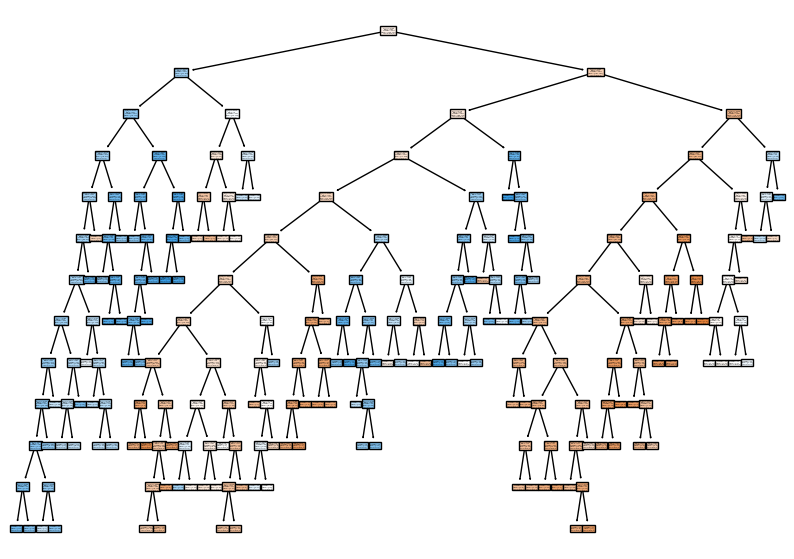

In [14]:
#Tree 5

splitter="random"
max_depth=12
min_samples_leaf=10
clf5 = tree.DecisionTreeClassifier(splitter=splitter, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
clf5 = clf5.fit(x_train, y_train)



fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf5, class_names= ("false (0)", "true (1)" ),filled=True)

data.append({'Splitter': splitter, 'Max depth': max_depth,  'Min samples': min_samples_leaf, 'Score eval': clf5.score(x_test, y_test)})


## Evaluation of prediction

- Error of prediction will be calculated through (prediction-y_test); we will get the percentage of number of good predictions

In [15]:
#Tree default
from sklearn.model_selection import cross_val_score

prediction0=clf0.predict(x_test)
print(clf0.score(x_test, y_test))
print(cross_val_score(clf0, x_test, y_test, cv=5))


0.6578199052132702
[0.64454976 0.63033175 0.66350711 0.59241706 0.66350711]


In [16]:
#Tree 1
prediction1=clf1.predict(x_test)

print(clf1.score(x_test, y_test))
print(cross_val_score(clf1, x_test, y_test, cv=5))

0.6616113744075829
[0.65402844 0.67298578 0.67298578 0.60189573 0.67772512]


In [17]:
#Tree 2
prediction2=clf2.predict(x_test)
print(clf2.score(x_test, y_test))
print(cross_val_score(clf2, x_test, y_test, cv=5))

0.6796208530805687
[0.62085308 0.64454976 0.67298578 0.61137441 0.64454976]


In [18]:
#Tree 3
prediction3=clf3.predict(x_test)
print(clf3.score(x_test, y_test))
print(cross_val_score(clf3, x_test, y_test, cv=5))

0.64739336492891
[0.64454976 0.67298578 0.65876777 0.60189573 0.65876777]


In [19]:
#Tree 4
prediction4=clf4.predict(x_test)
print(clf4.score(x_test, y_test))
print(cross_val_score(clf4, x_test, y_test, cv=5))

0.6824644549763034
[0.6492891  0.63981043 0.66824645 0.61611374 0.64454976]


In [20]:
#Tree 5
prediction5=clf5.predict(x_test)
print(clf5.score(x_test, y_test))
print(cross_val_score(clf5, x_test, y_test, cv=5))

0.6729857819905213
[0.66350711 0.6492891  0.67772512 0.60663507 0.67772512]


## Evaluate the impact 
- Change the accuracy for the maximum depth, splitting criterion, and the minimum sample leafs. 

In [21]:
import pandas as pd
table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='Score eval', ascending=False)
table

,Splitter,Max depth,Min samples,Score eval
4,random,5.0,1,0.682464
2,best,6.0,3,0.679621
5,random,12.0,10,0.672986
1,best,3.0,5,0.661611
0,best,-,1,0.657820
3,best,1.0,1,0.647393


## Confussion matrix

- We will see what values are false positive, false negative, true positives and true negatives

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt



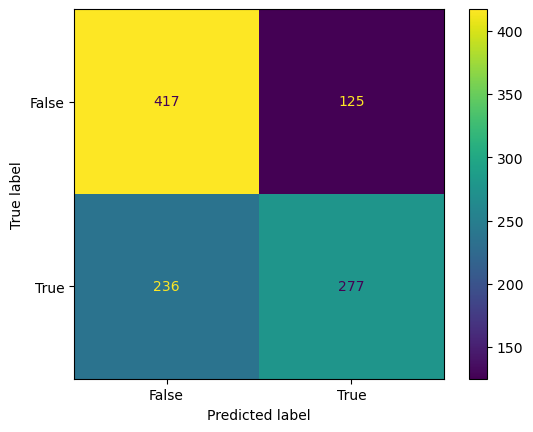

0.6578199052132702

In [23]:
#Matrix0
confusion_matrix0 = metrics.confusion_matrix(y_test, prediction0)
confusion_matrix0
cm_display0 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix0, display_labels = [False, True])
cm_display0.plot()
plt.show()

acc0=(confusion_matrix0[0,0]+confusion_matrix0[1,1])/(confusion_matrix0[0,0]+confusion_matrix0[0,1]+confusion_matrix0[1,0]+confusion_matrix0[1,1])
acc0

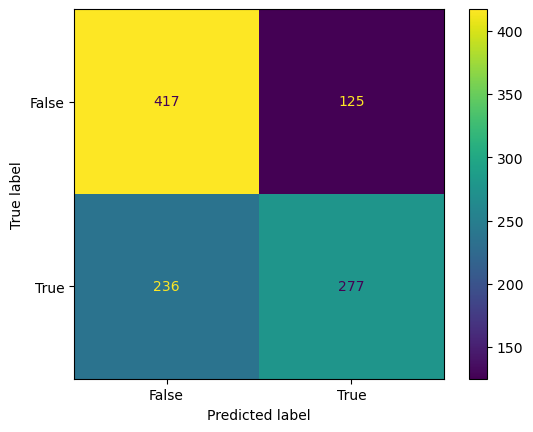

0.6616113744075829

In [24]:
#Matrix1
confusion_matrix1 = metrics.confusion_matrix(y_test, prediction1)
confusion_matrix1
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix0, display_labels = [False, True])
cm_display1.plot()
plt.show()

acc1=(confusion_matrix1[0,0]+confusion_matrix1[1,1])/(confusion_matrix1[0,0]+confusion_matrix1[0,1]+confusion_matrix1[1,0]+confusion_matrix1[1,1])
acc1

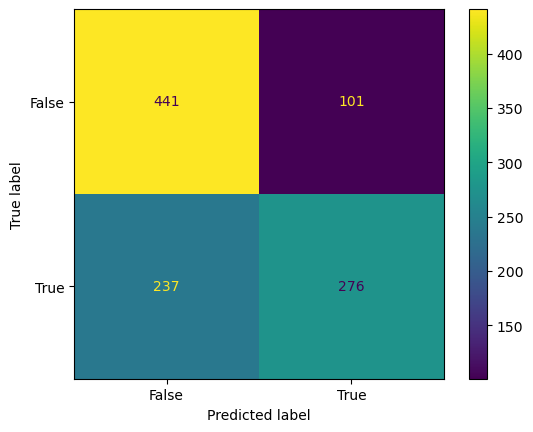

0.6796208530805687

In [28]:
#Matrix2
confusion_matrix2=metrics.confusion_matrix(y_test, prediction2)
confusion_matrix2
cm_display2= metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2,display_labels = [False, True])
cm_display2.plot()
plt.show()

acc2=(confusion_matrix2[0,0]+confusion_matrix2[1,1])/(confusion_matrix2[0,0]+confusion_matrix2[0,1]+confusion_matrix2[1,0]+confusion_matrix2[1,1])
acc2

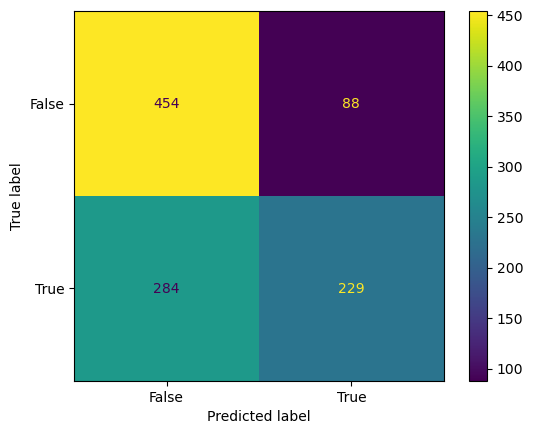

0.64739336492891

In [29]:
#Matrix3
confusion_matrix3 = metrics.confusion_matrix(y_test, prediction3)
confusion_matrix3
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])
cm_display3.plot()
plt.show()

acc3=(confusion_matrix3[0,0]+confusion_matrix3[1,1])/(confusion_matrix3[0,0]+confusion_matrix3[0,1]+confusion_matrix3[1,0]+confusion_matrix3[1,1])
acc3

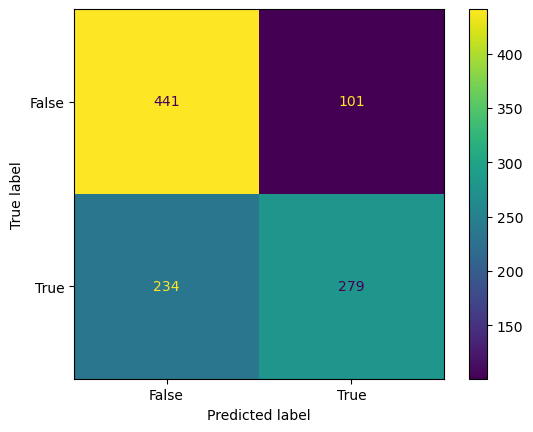

0.6824644549763034

In [32]:
#Matrix4
confusion_matrix4 = metrics.confusion_matrix(y_test, prediction4)
confusion_matrix4
cm_display4 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, display_labels = [False, True])
cm_display4.plot()
plt.show()

acc4=(confusion_matrix4[0,0]+confusion_matrix4[1,1])/(confusion_matrix4[0,0]+confusion_matrix4[0,1]+confusion_matrix4[1,0]+confusion_matrix4[1,1])
acc4

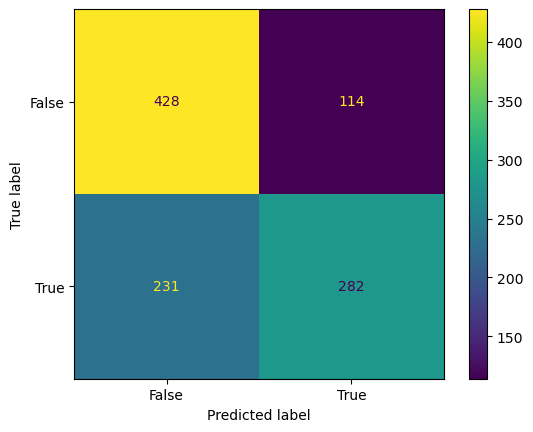

0.6729857819905213

In [33]:
#Matrix5
confusion_matrix5 = metrics.confusion_matrix(y_test, prediction5)
confusion_matrix5
cm_display5 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix5, display_labels = [False, True])
cm_display5.plot()
plt.show()

acc5=(confusion_matrix5[0,0]+confusion_matrix5[1,1])/(confusion_matrix5[0,0]+confusion_matrix5[0,1]+confusion_matrix5[1,0]+confusion_matrix5[1,1])
acc5

## 6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.

Notre groupe propose d'effectuer une évaluation globale avec toutes les ethnies et une évaluation de chaque groupe ethnique afin de comparer les pourcentages vrais et faux et d'être certain qu'il existe ou non une relation.